### Exploration of North Dakota's Wheat culture on a AG District level


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/ND_100y.csv')
df.columns

ParserError: ignored

In [ ]:
df = df.drop(['Program','State ANSI'],axis=1)
df.head(3)

NameError: ignored

In [ ]:
df['Week Ending'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df['Domain'].unique(),df['Domain Category'].unique(),df['Zip Code'].unique(), df['County'].unique() ,df['Region'].unique(), df['Watershed'].unique()

(array(['TOTAL'], dtype=object),
 array(['NOT SPECIFIED'], dtype=object),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]))

In [ ]:
df = df.drop(['Domain','Domain Category','Zip Code','County','County ANSI','Zip Code',
              'Region','Watershed','watershed_code','Geo Level','Commodity','Week Ending','CV (%)'],axis=1)

In [ ]:
df.columns

Index(['Year', 'Period', 'State', 'Ag District', 'Ag District Code',
       'Data Item', 'Value'],
      dtype='object')

In [ ]:
df.head()

,Year,Period,State,Ag District,Ag District Code,Data Item,Value
0,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED","482,000"
1,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, (EXCL DURUM) - ACRES PLANTED","527,000"
2,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, (EXCL DURUM) - PRODUCTION, MEAS...","22,945,000"
3,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED ...",47.6
4,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, DURUM - ACRES HARVESTED","18,700"


In [ ]:
df.dtypes

Year                 int64
Period              object
State               object
Ag District         object
Ag District Code     int64
Data Item           object
Value               object
dtype: object

In [ ]:
#Replace ,
df['Value'] = df['Value'].str.replace(',','').astype(float)

In [ ]:
df['Period'].unique()

array(['YEAR'], dtype=object)

In [ ]:
df.shape

(40400, 7)

In [ ]:
# Pivot the DataFrame
pivoted_df = df.pivot(index=['Year','Period','State','Ag District','Ag District Code'],
                      columns='Data Item', values='Value').reset_index()
pivoted_df

Data Item,Year,Period,State,Ag District,Ag District Code,WHEAT - ACRES HARVESTED,WHEAT - ACRES PLANTED,"WHEAT - ACRES PLANTED, NET","WHEAT - PRODUCTION, MEASURED IN BU","WHEAT - YIELD, MEASURED IN BU / ACRE",...,"WHEAT, WINTER, NON-IRRIGATED, CONTINUOUS CROP - PRODUCTION, MEASURED IN BU","WHEAT, WINTER, NON-IRRIGATED, CONTINUOUS CROP - YIELD, MEASURED IN BU / ACRE","WHEAT, WINTER, NON-IRRIGATED, CONTINUOUS CROP - YIELD, MEASURED IN BU / NET PLANTED ACRE","WHEAT, WINTER, NON-IRRIGATED, FOLLOWING SUMMER FALLOW - ACRES HARVESTED","WHEAT, WINTER, NON-IRRIGATED, FOLLOWING SUMMER FALLOW - ACRES PLANTED","WHEAT, WINTER, NON-IRRIGATED, FOLLOWING SUMMER FALLOW - ACRES PLANTED, NET","WHEAT, WINTER, NON-IRRIGATED, FOLLOWING SUMMER FALLOW - PRODUCTION, MEASURED IN BU","WHEAT, WINTER, NON-IRRIGATED, FOLLOWING SUMMER FALLOW - YIELD, MEASURED IN BU / ACRE","WHEAT, WINTER, NON-IRRIGATED, FOLLOWING SUMMER FALLOW - YIELD, MEASURED IN BU / NET PLANTED ACRE","WHEAT, WINTER, NON-IRRIGATED, FOLLOWING SUMMER FALLOW - YIELD, MEASURED IN BU / PLANTED ACRE"
0,1919,YEAR,NORTH DAKOTA,CENTRAL,50,968000.0,NaN,NaN,4806000.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1919,YEAR,NORTH DAKOTA,EAST CENTRAL,60,1208000.0,NaN,NaN,9624000.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1919,YEAR,NORTH DAKOTA,NORTH CENTRAL,20,1039000.0,NaN,NaN,6048000.0,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1919,YEAR,NORTH DAKOTA,NORTHEAST,30,1673000.0,NaN,NaN,17761000.0,10.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1919,YEAR,NORTH DAKOTA,NORTHWEST,10,1251000.0,NaN,NaN,8068000.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2019,YEAR,NORTH DAKOTA,"OTHER DISTRICTS, ALL COUNTIES",98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933,2019,YEAR,NORTH DAKOTA,SOUTH CENTRAL,80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,2019,YEAR,NORTH DAKOTA,SOUTHEAST,90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,2019,YEAR,NORTH DAKOTA,SOUTHWEST,70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivoted_df.to_csv('ND_100y_pivoted.csv',index=False)

In [ ]:
# Find columns with all NaN values
all_nan_columns = pivoted_df.columns[pivoted_df.isna().all()]
print(all_nan_columns)

Index([], dtype='object', name='Data Item')


In [ ]:
from IPython.display import display, HTML
nan_counts = pivoted_df.isna().sum()

# Convert the Series to HTML and enable scrolling for better display
style = """
    <style>
        .scrollable_dataframe {
            height: 400px;  # You can set a custom height here
            overflow-y: scroll;
            border: 1px solid #ddd;
            position: relative;
        }
    </style>
"""
html = (
    style +
    "<div class='scrollable_dataframe'>" +
    nan_counts.to_frame().to_html() +
    "</div>"
)

display(HTML(html))


,0
Data Item,
Year,0
Period,0
State,0
Ag District,0
Ag District Code,0
WHEAT - ACRES HARVESTED,137
WHEAT - ACRES PLANTED,227
"WHEAT - ACRES PLANTED, NET",649
"WHEAT - PRODUCTION, MEASURED IN BU",137


In [ ]:
df[['Type', 'Variable']] = df['Data Item'].str.split(' - ', expand=True)
df

,Year,Period,State,Ag District,Ag District Code,Data Item,Value,Type,Variable
0,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED",482000.0,"WHEAT, SPRING, (EXCL DURUM)",ACRES HARVESTED
1,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, (EXCL DURUM) - ACRES PLANTED",527000.0,"WHEAT, SPRING, (EXCL DURUM)",ACRES PLANTED
2,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, (EXCL DURUM) - PRODUCTION, MEAS...",22945000.0,"WHEAT, SPRING, (EXCL DURUM)","PRODUCTION, MEASURED IN BU"
3,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED ...",47.6,"WHEAT, SPRING, (EXCL DURUM)","YIELD, MEASURED IN BU / ACRE"
4,2019,YEAR,NORTH DAKOTA,CENTRAL,50,"WHEAT, SPRING, DURUM - ACRES HARVESTED",18700.0,"WHEAT, SPRING, DURUM",ACRES HARVESTED
...,...,...,...,...,...,...,...,...,...
40395,1919,YEAR,NORTH DAKOTA,SOUTHWEST,70,"WHEAT - PRODUCTION, MEASURED IN BU",1180000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
40396,1919,YEAR,NORTH DAKOTA,SOUTHWEST,70,"WHEAT - YIELD, MEASURED IN BU / ACRE",2.5,WHEAT,"YIELD, MEASURED IN BU / ACRE"
40397,1919,YEAR,NORTH DAKOTA,WEST CENTRAL,40,WHEAT - ACRES HARVESTED,649000.0,WHEAT,ACRES HARVESTED
40398,1919,YEAR,NORTH DAKOTA,WEST CENTRAL,40,"WHEAT - PRODUCTION, MEASURED IN BU",3342000.0,WHEAT,"PRODUCTION, MEASURED IN BU"


In [ ]:
df['Variable'].isna().sum(),df['Variable'].value_counts()

(0,
 Variable
 ACRES HARVESTED                             8226
 PRODUCTION, MEASURED IN BU                  8226
 YIELD, MEASURED IN BU / ACRE                8226
 ACRES PLANTED                               8143
 YIELD, MEASURED IN BU / NET PLANTED ACRE    3840
 ACRES PLANTED, NET                          3708
 YIELD, MEASURED IN BU / PLANTED ACRE          31
 Name: count, dtype: int64)

In [ ]:
df['Type'].isna().sum(),df['Type'].value_counts()

(0,
 Type
 WHEAT                                                                  3695
 WHEAT, SPRING, (EXCL DURUM)                                            3600
 WHEAT, SPRING, DURUM                                                   3476
 WHEAT, NON-IRRIGATED                                                   2540
 WHEAT, WINTER                                                          2491
 WHEAT, SPRING, DURUM, NON-IRRIGATED                                    2270
 WHEAT, SPRING, (EXCL DURUM), NON-IRRIGATED                             2264
 WHEAT, NON-IRRIGATED, CONTINUOUS CROP                                  2130
 WHEAT, NON-IRRIGATED, FOLLOWING SUMMER FALLOW                          2130
 WHEAT, SPRING, DURUM, NON-IRRIGATED, FOLLOWING SUMMER FALLOW           2026
 WHEAT, SPRING, DURUM, NON-IRRIGATED, CONTINUOUS CROP                   2026
 WHEAT, SPRING, (EXCL DURUM), NON-IRRIGATED, CONTINUOUS CROP            2020
 WHEAT, SPRING, (EXCL DURUM), NON-IRRIGATED, FOLLOWING SUMMER FALL

Constant columns: Index(['YIELD, MEASURED IN BU / PLANTED ACRE'], dtype='object', name='Variable')
Shape of the dataset:  (89, 8)
Starting year: 1919  Ending Year: 2007


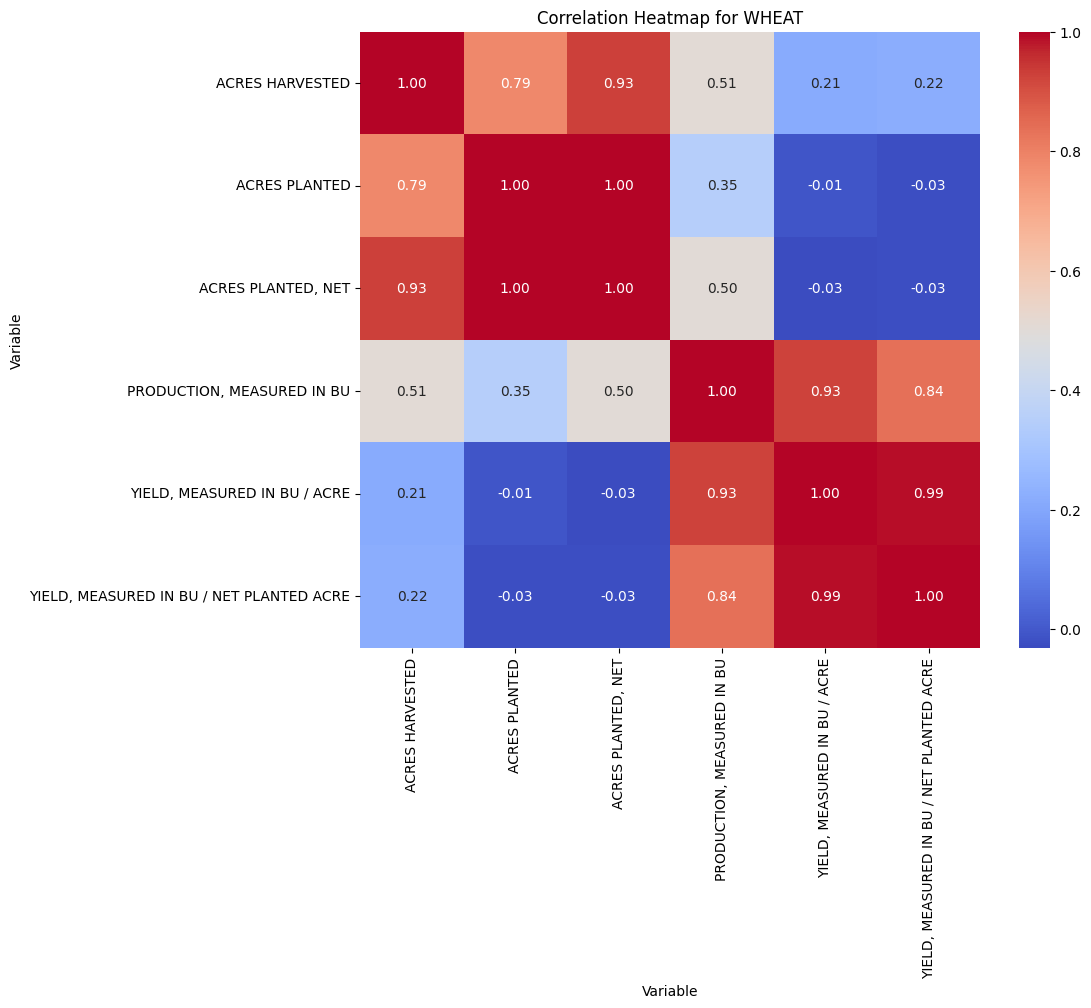

In [ ]:
# Choose the Type you're interested in
chosen_type = 'WHEAT'

# Filter the DataFrame for the chosen Type
df_filtered = df[df['Type'] == chosen_type]

# Pivot the DataFrame to get 'Year' as index and 'Variable' as columns
df_pivoted = df_filtered.pivot_table(index='Year', columns='Variable', values='Value').reset_index()

# Check for constant values
constant_columns = df_pivoted.columns[df_pivoted.nunique() <= 1]
print(f"Constant columns: {constant_columns}")
print('Shape of the dataset: ',df_pivoted.shape)
print('Starting year:', df_pivoted['Year'].min(),' Ending Year:', df_pivoted['Year'].max())

# Drop constant columns if any
df_pivoted = df_pivoted.drop(columns=constant_columns) #There is only one value for WHEAT - YIELD, MEASURED IN BU / PLANTED ACRE (0 in 2003)

df_pivoted = df_pivoted.drop('Year',axis=1)
# Compute the correlation matrix
corr_matrix = df_pivoted.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title(f'Correlation Heatmap for {chosen_type}')
plt.show()

In [ ]:
df_pivoted.isna().sum()

Variable
ACRES HARVESTED                              0
ACRES PLANTED                               10
ACRES PLANTED, NET                          57
PRODUCTION, MEASURED IN BU                   0
YIELD, MEASURED IN BU / ACRE                 0
YIELD, MEASURED IN BU / NET PLANTED ACRE    57
dtype: int64

In [ ]:
# Check if all rows where 'ACRES PLANTED, NET' is NaN also have NaN in 'YIELD, MEASURED IN BU / NET PLANTED ACRE'
nan_acres_planted_net = df_pivoted['ACRES PLANTED, NET'].isna()
nan_yield_per_net_planted_acre = df_pivoted['YIELD, MEASURED IN BU / NET PLANTED ACRE'].isna()

# Filtering the DataFrame for rows where 'ACRES PLANTED, NET' is NaN
nan_acres_planted_net_rows = df_pivoted[nan_acres_planted_net]

# Checking if all those rows also have NaN in 'YIELD, MEASURED IN BU / NET PLANTED ACRE'
all_nan_yield = nan_acres_planted_net_rows['YIELD, MEASURED IN BU / NET PLANTED ACRE'].isna().all()

all_nan_yield


True